<a href="https://colab.research.google.com/github/muken1128/machine-learning/blob/main/decision-tree/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 参考
# https://qiita.com/ameshikou/items/a41e11974d0dc245496e

In [1]:
# 実行環境 Python3.10.10

# がんの診断結果のデータを読み込み
from sklearn.datasets import load_breast_cancer

# データを読み込む
cancer = load_breast_cancer()

# 説明変数をXに、目的変数をyに格納
X = cancer.data
y = cancer.target

# DataFrameを作成
import pandas as pd
df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

陰性サンプル：212 , 陽性サンプル：357
特徴量数：30


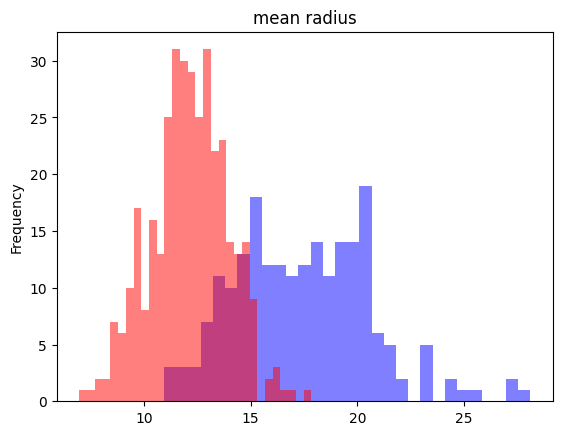

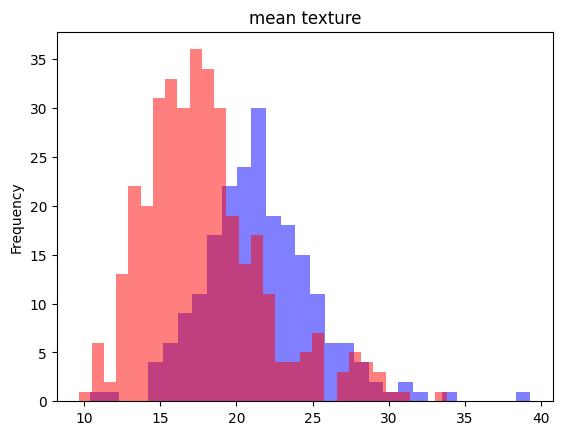

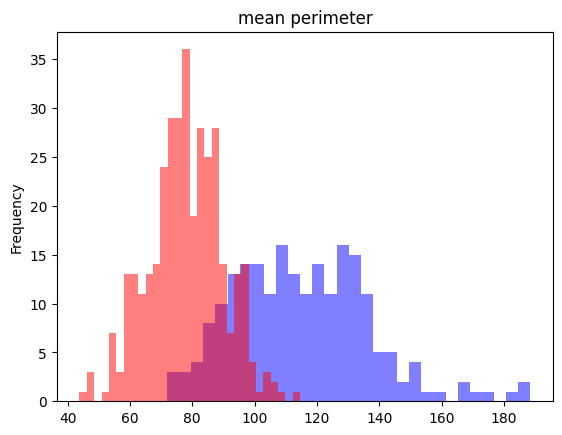

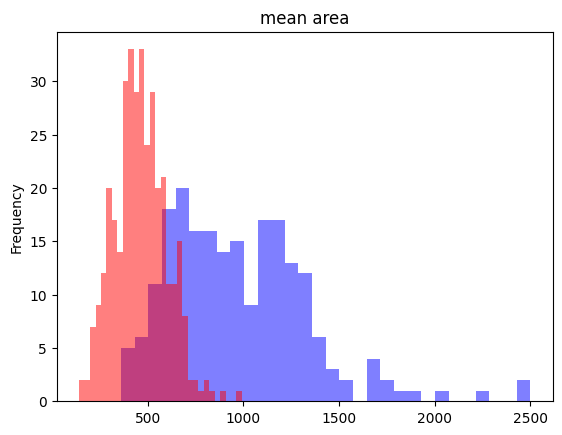

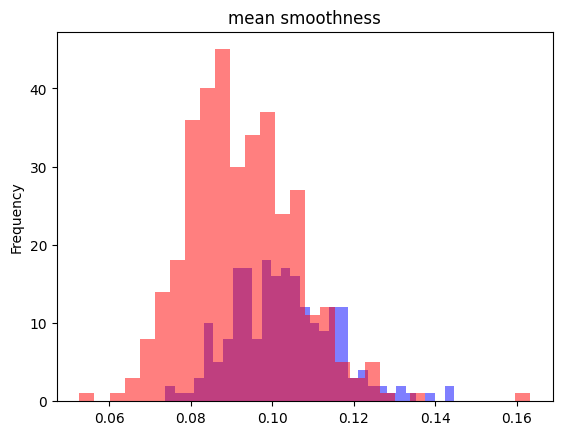

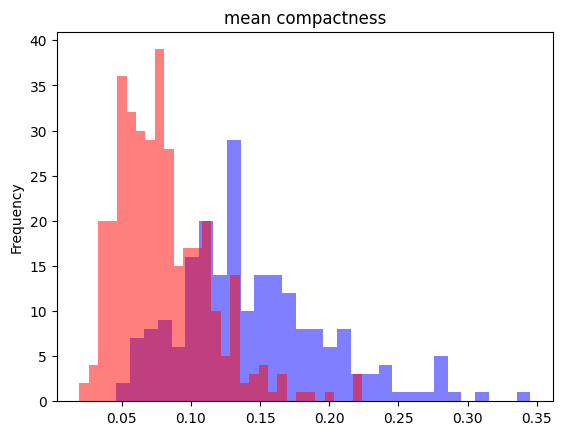

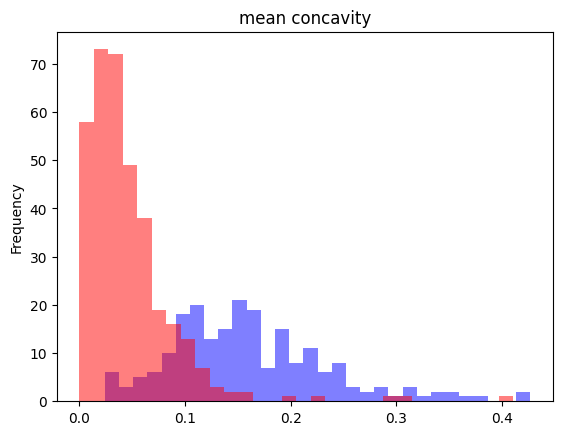

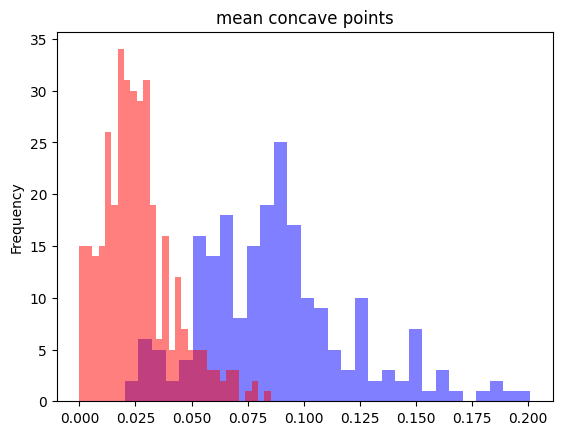

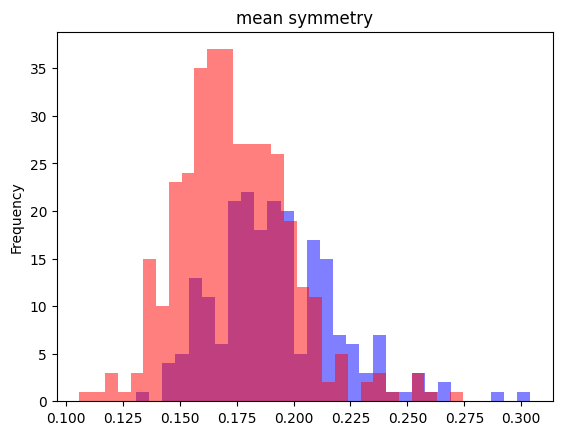

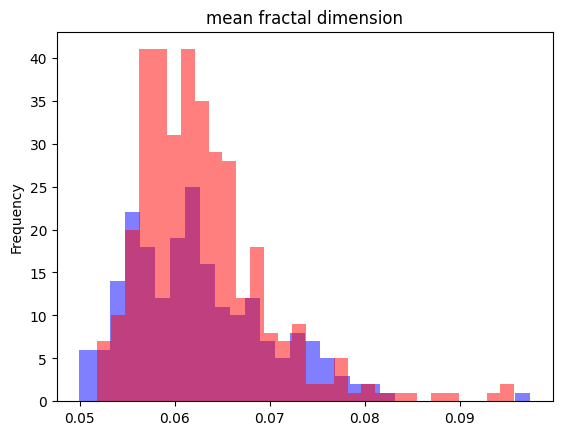

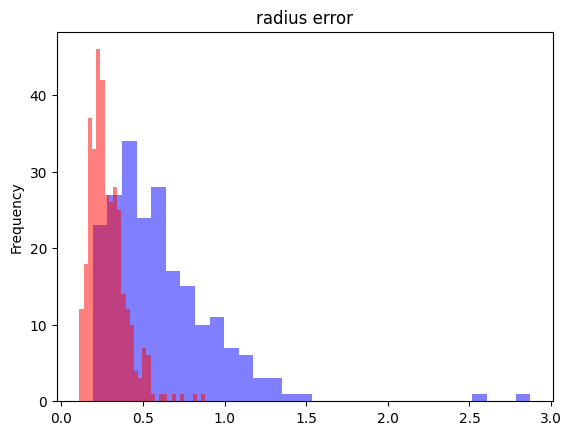

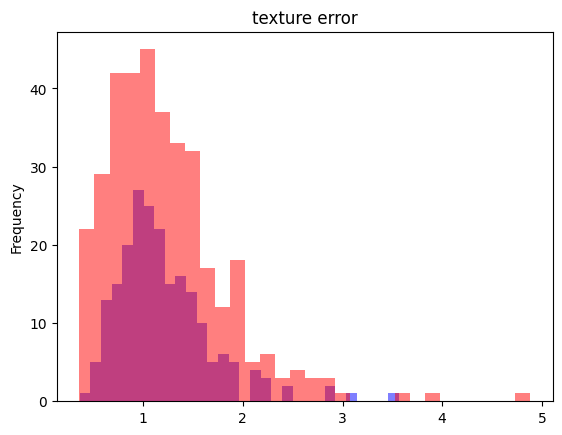

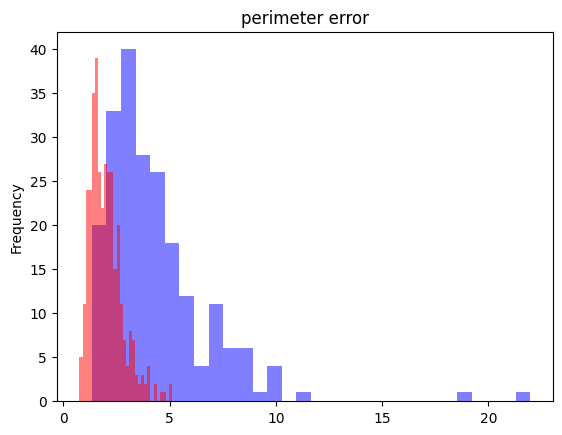

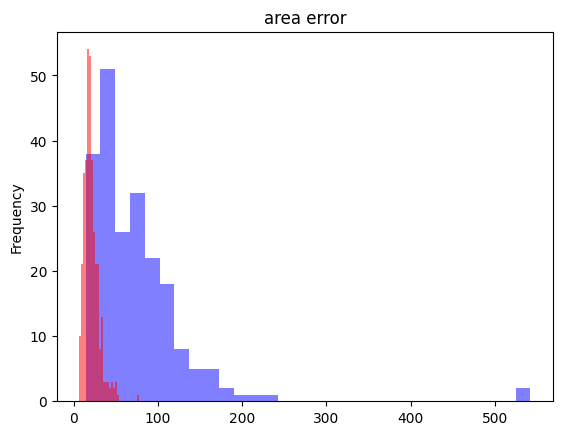

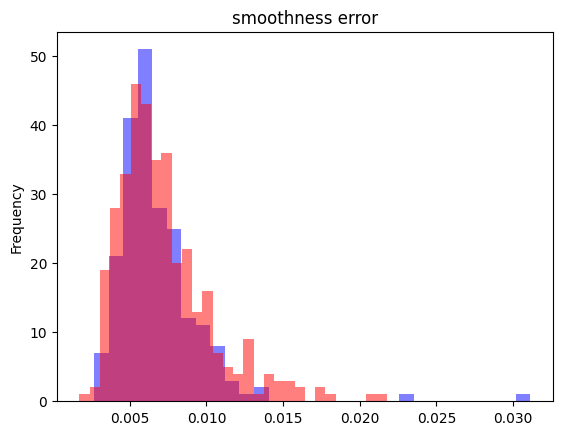

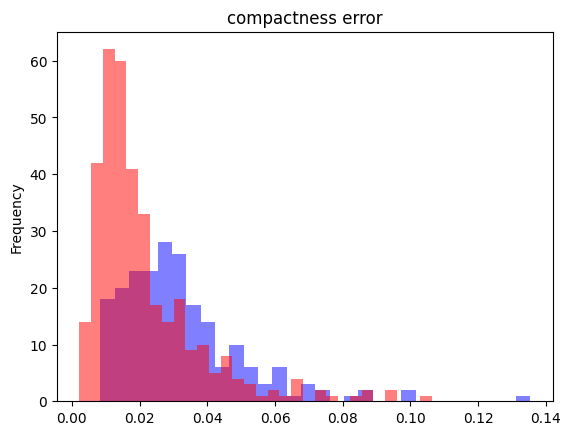

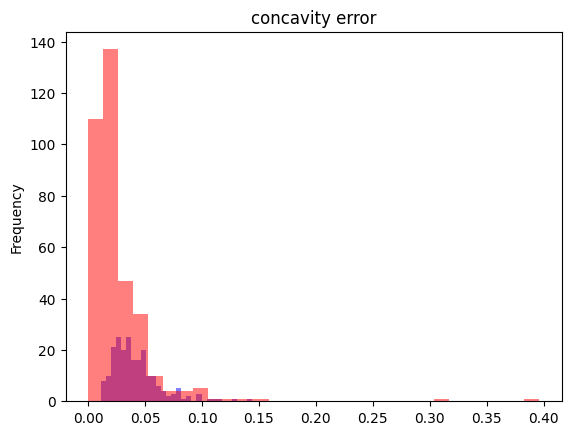

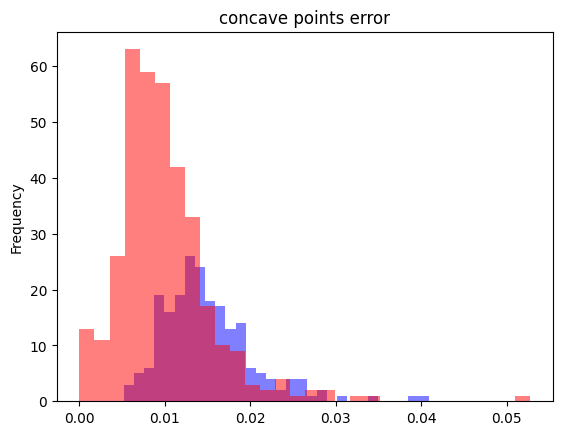

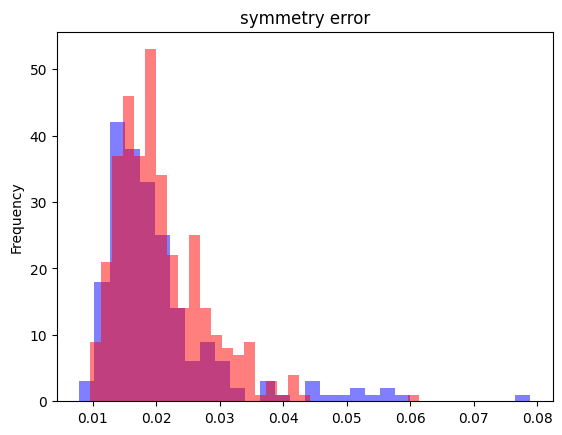

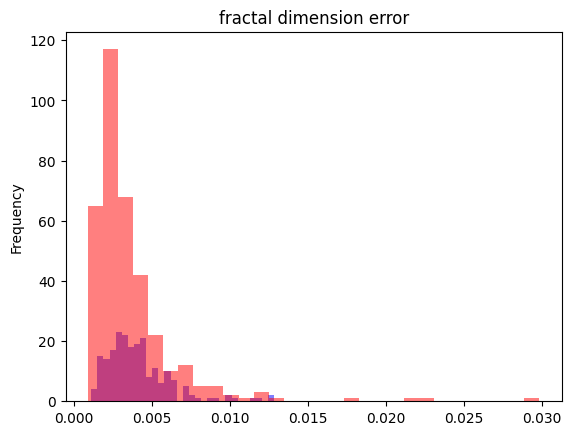

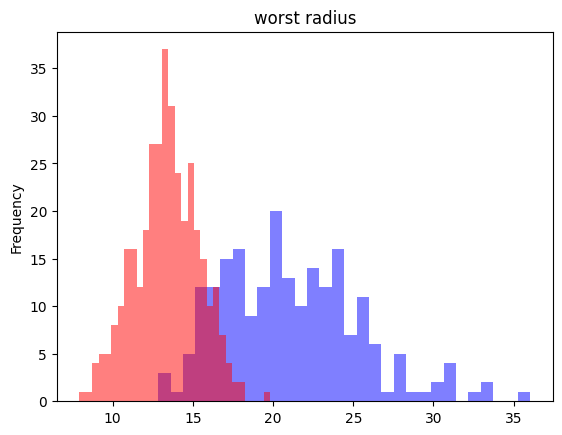

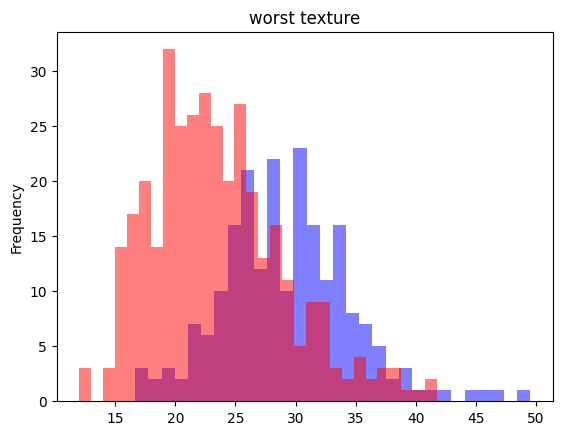

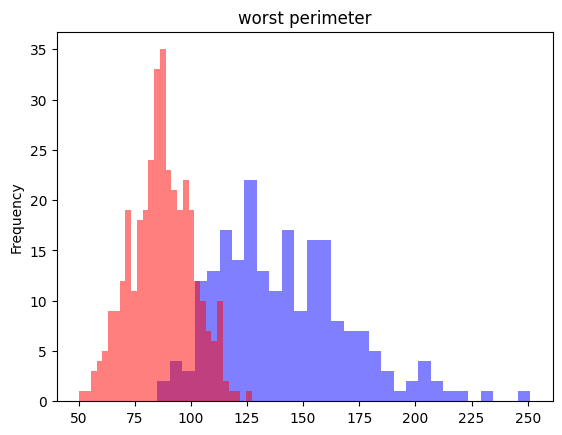

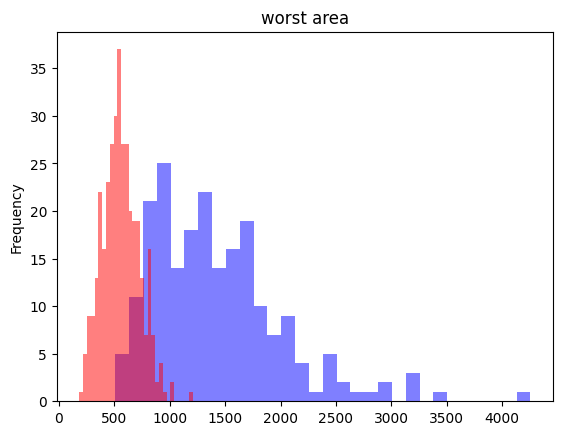

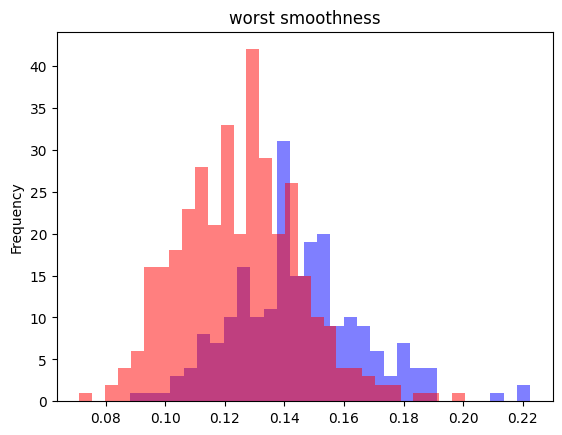

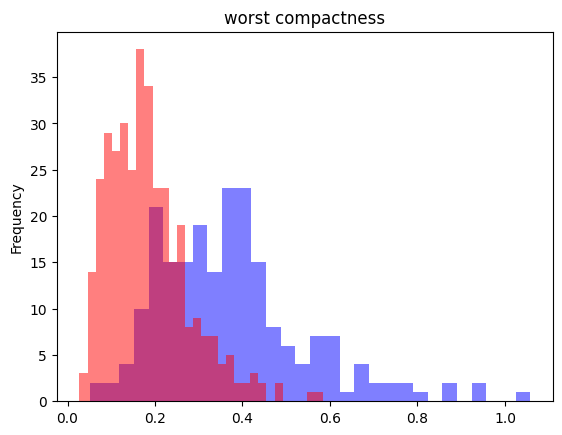

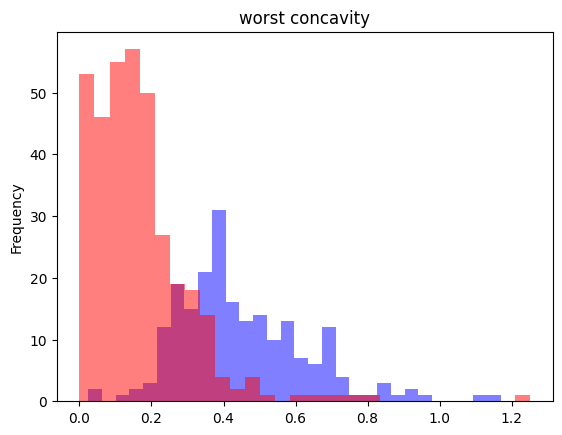

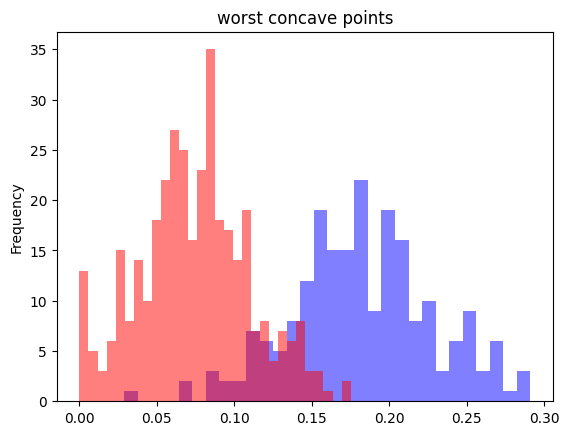

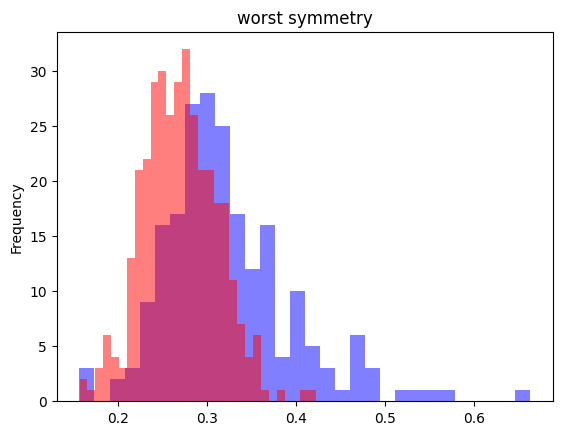

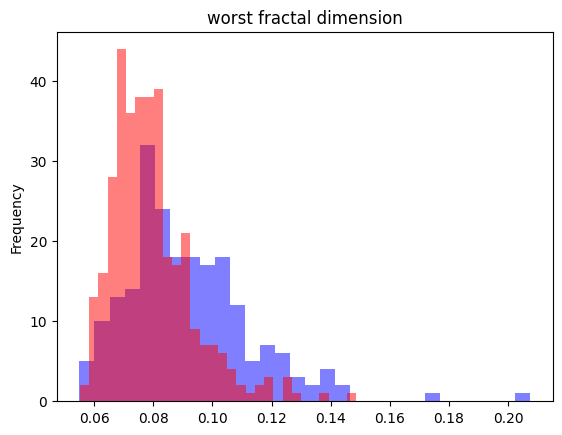

In [2]:
# target=0（良性）,target=1 (悪性) のデータを抽出して特徴量のバープロットを作成
import matplotlib.pyplot as plt
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]

# 陽性サンプルと陰性サンプルの数を表示
print("陰性サンプル：%d"%len(df_0), ",","陽性サンプル：%d"%len(df_1))
print("特徴量数：%d"%(len(df_0.columns)-1))

for i in range(30):
    # 30個の図を10行3列にプロット
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.title(df_0.columns[i])
    df_0.iloc[:,i].plot(kind='hist', bins=30, color='blue', alpha=0.5)
    df_1.iloc[:,i].plot(kind='hist', bins=30, color='red', alpha=0.5)
    plt.show()

In [3]:
# dfは上で定義したものと同じ

# df_xは説明変数(全体からtaget列を削除する)
df_x = df.drop("target",axis=1)

# df_yは目的変数(target列を指定する)
df_y = df["target"]

In [4]:
# sklearnからRandomForestClassiferモデルをインポート
from sklearn.ensemble import RandomForestClassifier as RFC

# モデルのインスタンスを作る
model = RFC(random_state=0)

# データを指定の割合に分けるモジュール
from sklearn.model_selection import train_test_split

# データを学習用、検証用に分割する(乱数シードを0、テストデータの割合を0.3に指定)
x_train,x_val,y_train,y_val = train_test_split(df_x, df_y, test_size=0.3, random_state=0)

# fitメソッドで学習((説明変数,目的変数)を指定する)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.97      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



<Axes: >

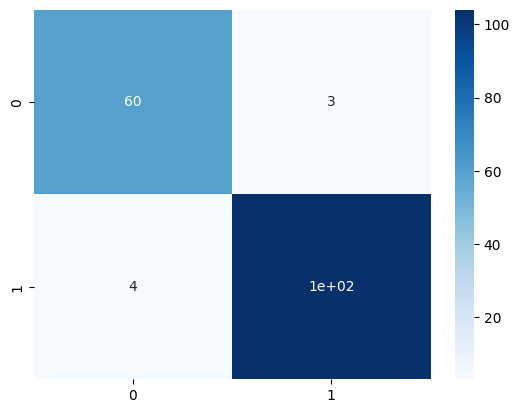

In [5]:
# 検証用データで予測値を生成する
y_pred = model.predict(x_val)

# 検証用データで予測した結果のclassfication_reportを表示する
# 必要なモジュールをインポート
from sklearn.metrics import classification_report
# classfication_reportを表示
print(classification_report(y_val,y_pred))

# 混同行列を作成してseabornで表示する
# 必要なモジュールをインポート
from sklearn.metrics import confusion_matrix
import seaborn as sns
# 混同行列を表示
cm = confusion_matrix(y_val,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

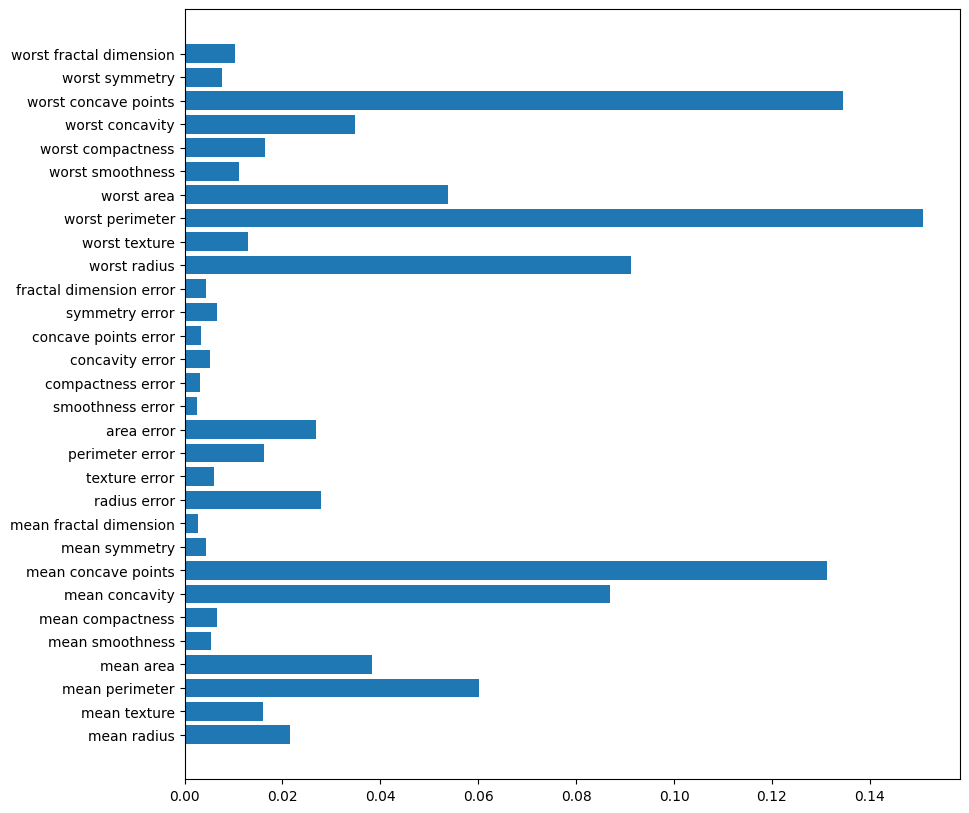

In [6]:
# モデルの特徴量の重要度を図示する
importances = model.feature_importances_
plt.figure(figsize=(10,10))
plt.barh(df_x.columns, importances)
plt.show()